# PennyLane

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ionq-samples/getting-started/blob/main/pennylane/main.ipynb)

In [1]:
%%capture

# First, we install the essential libraries to our current Python runtime.
# "%%capture" (above) captures and in this case, hides the output of this 
# cell, so you can comment it out if you need help debugging this step.

%pip install pennylane pennylane-ionq

In [2]:
import pennylane as qml

import os
from getpass import getpass

# Before you begin, get your API key from https://cloud.ionq.com/settings/keys

# If your API key is stored as "IONQ_API_KEY" in your local environment, this
# should find it. Otherwise you'll be prompted to enter your API key manually.
 
api_key = os.getenv('IONQ_API_KEY') or getpass('Enter your IonQ API key: ')

# We need to specify the device where the circuit will be executed. In
# this case we're using the `ionq.simulator`, but if you have QPU access you
# can specify it here to run the job on a QPU directly.

dev = qml.device(
    'ionq.simulator',
    api_key=api_key,
    wires=2,
)

In [3]:
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts()

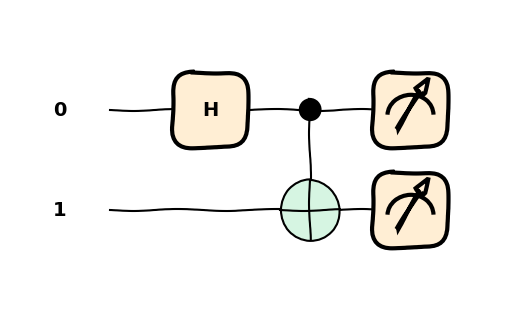

In [4]:
fig, ax = qml.draw_mpl(circuit, style='sketch')()

In [5]:
results = circuit()
print({k: v.item() for k, v in results.items()})

{'00': 516, '11': 508}
